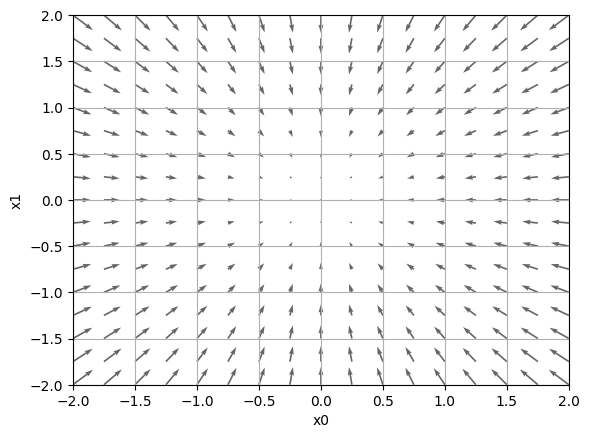

In [1]:
%run ./sample_programs/gradient_2d.py

## 4.4


In [2]:
import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val

    return grad


In [3]:
# [3.0, 4.0]のとき
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [4]:
# [0.0, 2.0]のとき
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [5]:
# [3.0, 0.0]のとき
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

#### 学習率0.01のとき
init_x：初期値，lr：学習率，step_num：更新回数

In [6]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

#### 学習率10.0 と大きいとき

In [8]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

# 発散してしまう！

array([-2.58983747e+13, -1.29524862e+12])

#### 学習率が1e-10と小さいとき

In [9]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

# 全然更新されない！

array([-2.99999994,  3.99999992])

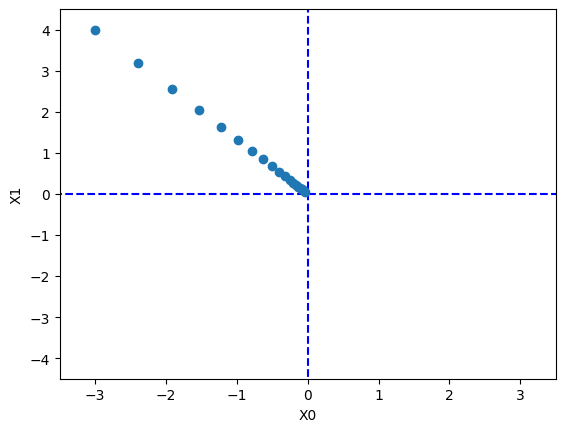

In [10]:
%run ./sample_programs/gradient_method.py

#### ニューラルネットワークの勾配

In [11]:
from function04 import SimpleNet as simpleNet
net = simpleNet()

print(net.W)


[[-0.69289227  1.11542869  0.03859316]
 [-0.80474592 -0.25620771  0.87069252]]


In [12]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.14000669  0.43867028  0.80677916]


In [13]:
t = np.array([0, 0, 1]) # 正解ラベル
net.loss(x, t)

0.6069210884652624

In [14]:
def f(W): # Wはダミー
    return net.loss(x, t)
dW = numerical_gradient(f, net.W) # loss関数をwで微分＝勾配
print(dW)

[[ 0.04667564  0.22630855 -0.27298418]
 [ 0.07001346  0.33946282 -0.40947628]]


In [15]:
f = lambda W: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.04667564  0.22630855 -0.27298418]
 [ 0.07001346  0.33946282 -0.40947628]]


各ｗにおいて，  
w>0：h増やすと損失関数もwh分増える → マイナス方向に更新するべき  
w<0：h増やすと損失関数がwh分減る → プラス方向に更新するべき

## 4.5

In [16]:
from function04 import TwoLayerNet

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


In [17]:
x = np.random.rand(100, 784)
y = net.predict(x)
print(y.shape)

(100, 10)


In [18]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


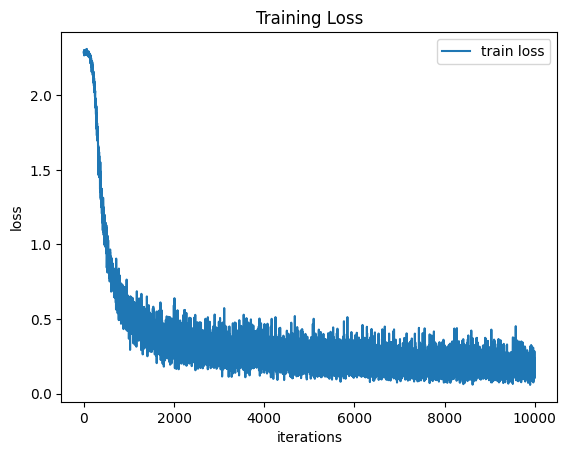

In [19]:
%run ./function04/train_neuralnet.py

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7716166666666666, 0.776
train acc, test acc | 0.8766, 0.8799
train acc, test acc | 0.89765, 0.9012
train acc, test acc | 0.9074666666666666, 0.9108
train acc, test acc | 0.9134333333333333, 0.9147
train acc, test acc | 0.91955, 0.9208
train acc, test acc | 0.9236166666666666, 0.9251
train acc, test acc | 0.92645, 0.9272
train acc, test acc | 0.9297166666666666, 0.9313
train acc, test acc | 0.9332, 0.9332
train acc, test acc | 0.93685, 0.9355
train acc, test acc | 0.9391166666666667, 0.9374
train acc, test acc | 0.9413333333333334, 0.9394
train acc, test acc | 0.9439, 0.9418
train acc, test acc | 0.9452, 0.944
train acc, test acc | 0.9474, 0.9448


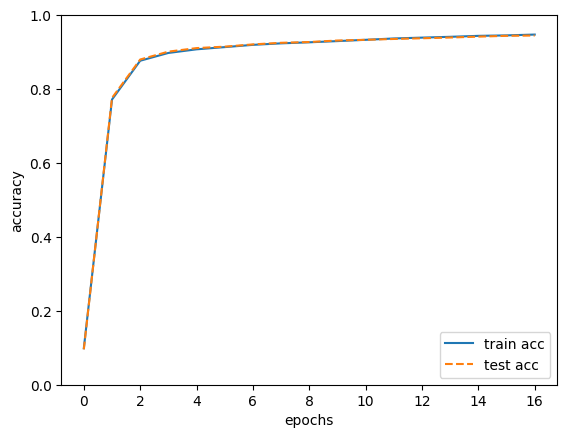

In [20]:
%run ./function04/train_neuralnet_epoch.py